<a href="https://colab.research.google.com/github/vrushikesh123/EXPAILAB-40/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (158, 25)

--- Data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-nul

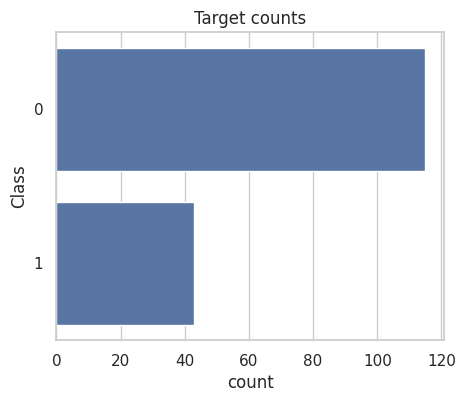

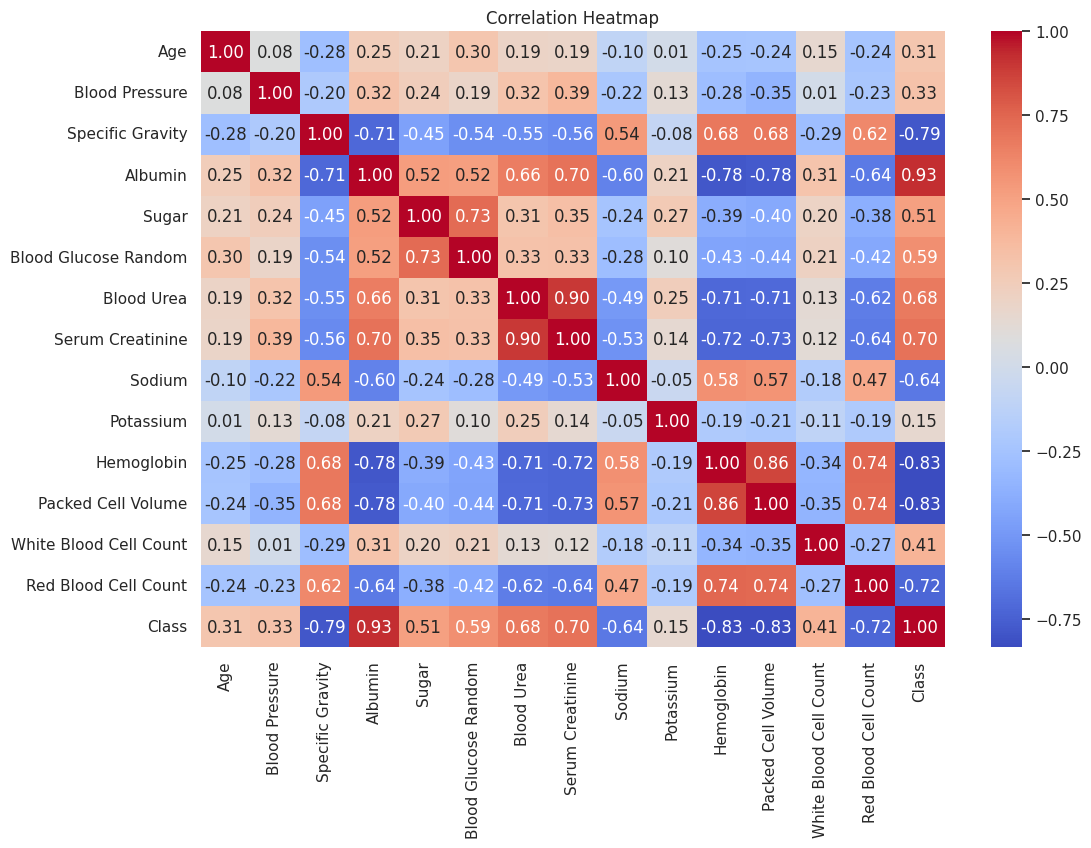

Before SMOTE: Class
0    92
1    34
Name: count, dtype: int64
After SMOTE: Class
0    92
1    92
Name: count, dtype: int64

LogisticRegression - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000

DecisionTree - Acc:0.9688 Prec:1.0000 Rec:0.8889 F1:0.9412 ROC:0.9444

RandomForest - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000

SVM - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000

KNN - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000

XGBoost - Acc:0.9688 Prec:1.0000 Rec:0.8889 F1:0.9412 ROC:0.9444


,accuracy,precision,recall,f1,roc_auc
name,,,,,
LogisticRegression,1.00000,1.0,1.000000,1.000000,1.000000
DecisionTree,0.96875,1.0,0.888889,0.941176,0.944444
RandomForest,1.00000,1.0,1.000000,1.000000,1.000000
SVM,1.00000,1.0,1.000000,1.000000,1.000000
KNN,1.00000,1.0,1.000000,1.000000,1.000000
XGBoost,0.96875,1.0,0.888889,0.941176,0.944444


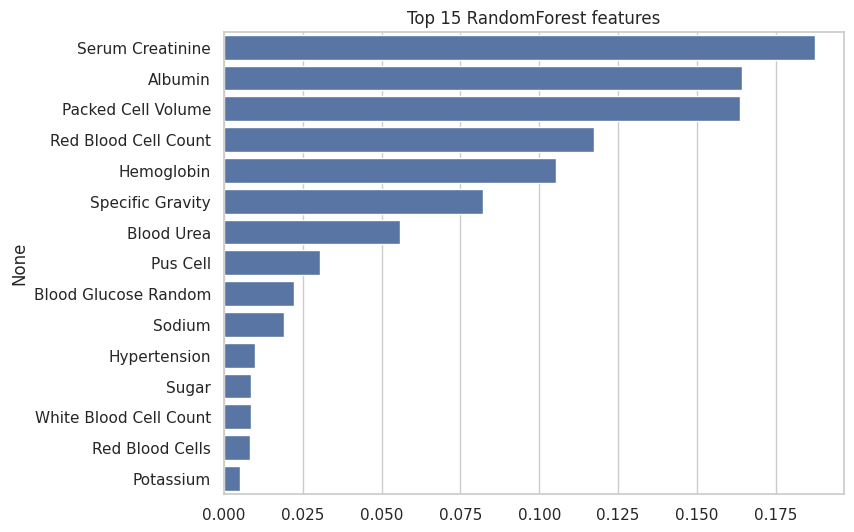

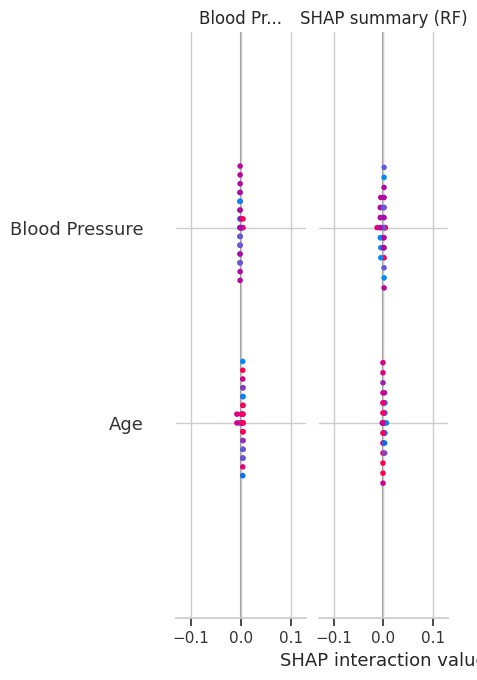

LIME explanation (first test instance):
[('Serum Creatinine <= -0.65', -0.1363383778416854), ('0.20 < Packed Cell Volume <= 0.82', -0.06682611166692659), ('Hemoglobin > 0.83', -0.0630462796811849), ('0.42 < Specific Gravity <= 1.23', -0.056452564750574766), ('0.00 < Pus Cell <= 1.00', -0.032163891733352205), ('Albumin <= -0.92', -0.030763407976560832)]


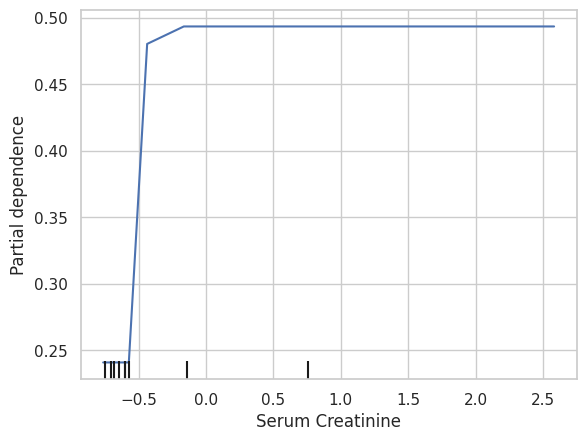

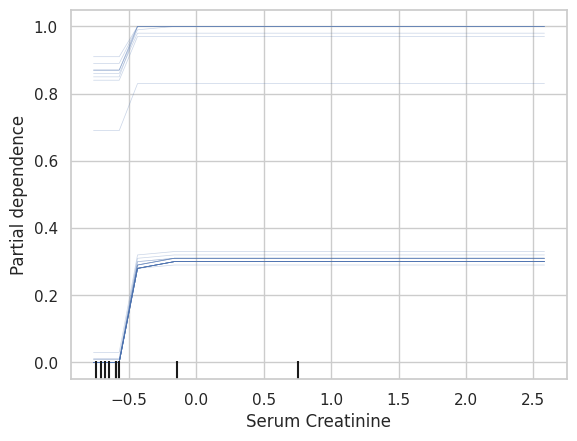

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Keras Model - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Keras Model - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Keras Model - Acc:0.8125 Prec:0.6154 Rec:0.8889 F1:0.7273 ROC:0.9372
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Autoencoder+RF - Acc:1.0000 Prec:1.0000 Rec:1.0000 F1:1.0000 ROC:1.0000


,accuracy,precision,recall,f1,roc_auc
name,,,,,
LogisticRegression,1.00000,1.000000,1.000000,1.000000,1.000000
DecisionTree,0.96875,1.000000,0.888889,0.941176,0.944444
RandomForest,1.00000,1.000000,1.000000,1.000000,1.000000
SVM,1.00000,1.000000,1.000000,1.000000,1.000000
KNN,1.00000,1.000000,1.000000,1.000000,1.000000
XGBoost,0.96875,1.000000,0.888889,0.941176,0.944444
MLP,1.00000,1.000000,1.000000,1.000000,1.000000
CNN1D,1.00000,1.000000,1.000000,1.000000,1.000000
LSTM,0.81250,0.615385,0.888889,0.727273,0.937198


Saved model comparison to model_comparison_results.xlsx


In [1]:
# === 0. Install packages (run only in Colab or if missing) ===
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost imbalanced-learn tensorflow shap openpyxl pdpbox lime

# === 1. Imports ===
import os, warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay
sns.set(style='whitegrid')

# === 2. Load CKD dataset ===
CKD_RAW_URL = "https://raw.githubusercontent.com/ncssm/dssi23/main/assets/data/ckd.csv"
df = pd.read_csv(CKD_RAW_URL)
print("Dataset shape:", df.shape)
df.head()

# === 3. Quick EDA ===
print("\n--- Data info ---")
print(df.info())
print("\n--- Missing values ---")
print(df.isna().sum())
print("\n--- Target distribution ---")
target_col = 'Class' if 'Class' in df.columns else df.columns[-1]
print(df[target_col].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(y=df[target_col])
plt.title('Target counts')
plt.show()

# Numeric correlation heatmap
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# === 4. Preprocessing ===
df.columns = [c.strip() for c in df.columns]
df[target_col] = df[target_col].astype(str).str.strip().str.lower()
mapping = {}
if set(['ckd','notckd']).intersection(df[target_col].unique()):
    mapping = {'ckd':1,'notckd':0}
elif set(['yes','no']).intersection(df[target_col].unique()):
    mapping = {'yes':1,'no':0}
if mapping:
    df[target_col] = df[target_col].map(mapping)
df = df.dropna(how='all')

# Identify categorical/numeric
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if target_col in cat_cols: cat_cols.remove(target_col)
num_cols = [c for c in df.columns if c not in cat_cols + [target_col]]

# Impute
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip()
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols)

# Features and labels
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Before SMOTE:", y_train.value_counts())

# SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", pd.Series(y_train_res).value_counts())

# Scale numeric
scaler = StandardScaler()
X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# === 5. Helper evaluation function ===
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else np.zeros(len(y_test))
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test))>1 else np.nan
    print(f"\n{name} - Acc:{acc:.4f} Prec:{prec:.4f} Rec:{rec:.4f} F1:{f1:.4f} ROC:{roc:.4f}")
    return {'name':name,'accuracy':acc,'precision':prec,'recall':rec,'f1':f1,'roc_auc':roc}

# === 6. ML Models ===
results = []

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
results.append(evaluate_model('LogisticRegression', lr, X_test, y_test))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
results.append(evaluate_model('DecisionTree', dt, X_test, y_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
results.append(evaluate_model('RandomForest', rf, X_test, y_test))

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)
results.append(evaluate_model('SVM', svm_model, X_test, y_test))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)
results.append(evaluate_model('KNN', knn, X_test, y_test))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
results.append(evaluate_model('XGBoost', xgb_model, X_test, y_test))

# ML Results
ml_results = pd.DataFrame(results).set_index('name')
display(ml_results)

# === 7. Feature Importance ===
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title('Top 15 RandomForest features')
plt.show()

# === 8. SHAP (RandomForest) ===
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, show=False)
plt.title('SHAP summary (RF)')
plt.show()

# === 9. LIME ===
lime_exp = LimeTabularExplainer(np.array(X_train_res), feature_names=X.columns.tolist(),
                                class_names=['notckd','ckd'], mode='classification')
exp = lime_exp.explain_instance(X_test.iloc[0].values, rf.predict_proba, num_features=6)
print("LIME explanation (first test instance):")
print(exp.as_list())

# === 10. PDP / ICE ===
top_feat = importances.index[0]
PartialDependenceDisplay.from_estimator(rf, X_test, [top_feat], kind='average')
plt.show()
PartialDependenceDisplay.from_estimator(rf, X_test, [top_feat], kind='individual')
plt.show()

# === 11. Deep Learning Models ===
X_tr = X_train_res.values.astype('float32')
X_te = X_test.values.astype('float32')
y_tr = y_train_res.astype('float32')
y_te = y_test.astype('float32')

def compile_and_evaluate_keras(model, X_tr, y_tr, X_te, y_te, epochs=50):
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    model.fit(X_tr, y_tr, validation_split=0.1, epochs=epochs, batch_size=32, callbacks=[es], verbose=0)
    y_proba = model.predict(X_te).ravel()
    y_pred = (y_proba>=0.5).astype(int)
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    roc = roc_auc_score(y_te, y_proba)
    print(f"Keras Model - Acc:{acc:.4f} Prec:{prec:.4f} Rec:{rec:.4f} F1:{f1:.4f} ROC:{roc:.4f}")
    return {'accuracy':acc,'precision':prec,'recall':rec,'f1':f1,'roc_auc':roc}

# MLP
mlp = Sequential([Input(shape=(X_tr.shape[1],)), Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])
mlp_res = compile_and_evaluate_keras(mlp, X_tr, y_tr, X_te, y_te)

# CNN1D
X_tr_c = X_tr.reshape((X_tr.shape[0], X_tr.shape[1], 1))
X_te_c = X_te.reshape((X_te.shape[0], X_te.shape[1], 1))
cnn = Sequential([Input(shape=(X_tr.shape[1],1)), Conv1D(32,3,activation='relu',padding='same'), Conv1D(64,3,activation='relu',padding='same'), Flatten(), Dense(64,activation='relu'), Dense(1,activation='sigmoid')])
cnn_res = compile_and_evaluate_keras(cnn, X_tr_c, y_tr, X_te_c, y_te, epochs=50)

# LSTM
X_tr_l = X_tr_c
X_te_l = X_te_c
lstm = Sequential([Input(shape=(X_tr.shape[1],1)), LSTM(64), Dense(32,activation='relu'), Dense(1,activation='sigmoid')])
lstm_res = compile_and_evaluate_keras(lstm, X_tr_l, y_tr, X_te_l, y_te, epochs=50)

# Autoencoder + RF
input_layer = Input(shape=(X_tr.shape[1],))
encoded = Dense(64,activation='relu')(input_layer)
encoded = Dense(32,activation='relu')(encoded)
bottleneck = Dense(16,activation='relu',name='bottleneck')(encoded)
decoded = Dense(32,activation='relu')(bottleneck)
decoded = Dense(64,activation='relu')(decoded)
decoded = Dense(X_tr.shape[1],activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_tr,X_tr,epochs=50,batch_size=32,validation_split=0.1,verbose=0)
encoder = Model(input_layer, autoencoder.get_layer('bottleneck').output)
X_tr_enc = encoder.predict(X_tr)
X_te_enc = encoder.predict(X_te)
clf_enc = RandomForestClassifier(n_estimators=100, random_state=42)
clf_enc.fit(X_tr_enc, y_tr)
enc_res = evaluate_model('Autoencoder+RF', clf_enc, X_te_enc, y_te)

# === 12. Save results table ===
all_results = ml_results.copy()
dl_df = pd.DataFrame([
    {'name':'MLP', **mlp_res},
    {'name':'CNN1D', **cnn_res},
    {'name':'LSTM', **lstm_res},
    {'name':'Autoencoder+RF', 'accuracy':enc_res['accuracy'], 'precision':enc_res['precision'], 'recall':enc_res['recall'], 'f1':enc_res['f1'], 'roc_auc':enc_res['roc_auc']}
]).set_index('name')
all_results = pd.concat([all_results, dl_df])
all_results.to_excel('model_comparison_results.xlsx')
display(all_results)
print("Saved model comparison to model_comparison_results.xlsx")
